# Ejercicio red neuronal del dataset del mnist

In [1]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.3.1


Importar el datase de keras

In [23]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Consultar características del tensor (ejes, forma, tipo de datos)

In [3]:
print(x_train.ndim)
print(x_train.shape)
print(x_train.dtype)

3
(60000, 28, 28)
uint8


Consulta de longitud del dataset

In [5]:
print(len(y_train))
print(len(y_test))

60000
10000


Ver una imagen del dataset

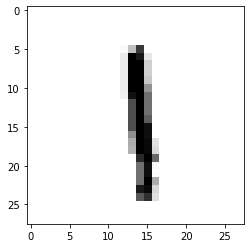

In [24]:
import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap=plt.cm.binary)

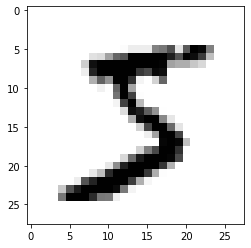

In [8]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

Consulta de las etiquetas

In [10]:
print(y_train[8])
print(y_train[0])

1
5


Consutar todas las etiquetas en un rango

In [14]:
for i in range(10): 
    print(str(i) + " -> " + str(y_train[i]))

0 -> 5
1 -> 0
2 -> 4
3 -> 1
4 -> 9
5 -> 2
6 -> 1
7 -> 3
8 -> 1
9 -> 4


consultar información de los pixeles de la imágen

In [25]:
import numpy
from numpy import linalg
numpy.set_printoptions(precision=2, suppress=True, linewidth=120)
print(numpy.matrix(x_train[0]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

Conversión del dataset para la normalización

In [26]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

imprimimos la matriz convertida

In [28]:
print(numpy.matrix(x_train[0]))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.07 0.07 0.07 0.49 0.53 0.69 0.1  0.65 1.   0.97
  0.5  0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.12 0.14 0.37 0.6  0.67 0.99 0.99 0.99 0.99 0.99 0.88 0.67 0.99 0.95 0.76
  0.25 0.   0.   0.   0

Conversion a vectores para normalizar

In [30]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [31]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Normalizar etiquetas de los datasets

In [32]:
from keras.utils import to_categorical

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [34]:
print(y_train[0])
print(y_train[8])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


## Definición del modelo

importando los modulos de modelos, capas y optimizdores

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import sgd

definición del modelo elegido

In [37]:
model = Sequential()

agregando las capas al modelo

In [39]:
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

Consultando información del modelo

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


## Aprendizaje, entrenamiento y evaluación

Definición de las variables para el entranamiento del modelo

In [42]:
batch_size = 50
num_classes = 10
epochs = 10

Compilación del modelo

In [43]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

ajuste del modelo

In [44]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 4s 70us/step - loss: 2.0787 - accuracy: 0.4223
Epoch 2/10
60000/60000 [==============================] - 2s 41us/step - loss: 1.6091 - accuracy: 0.6628
Epoch 3/10
60000/60000 [==============================] - 2s 39us/step - loss: 1.2675 - accuracy: 0.7405
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 1.0369 - accuracy: 0.7924
Epoch 5/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.8807 - accuracy: 0.8256
Epoch 6/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.7711 - accuracy: 0.8440
Epoch 7/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.6912 - accuracy: 0.8554
Epoch 8/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.6311 - accuracy: 0.8642
Epoch 9/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.5848 - accuracy: 0.8709
Epoch 10/10
60000/60000 [==============================

Predicciones

In [45]:
predictions = model.predict(x_test)

In [47]:
print(numpy.sum(predictions[11]))

1.0


In [48]:
print(numpy.argmax(predictions[11]))

6


Definición de la función para verificar la matriz de confusión

In [58]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Plot matriz de confusion', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

Genrear la matriz de confusión

In [53]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

y_pred = model.predict(x_test)
y_pred_classes = numpy.argmax(y_pred, axis=1)
y_true = numpy.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

imprimir la matriz de confusion generada

In [54]:
print(confusion_mtx)

[[ 951    0    3    6    0    7    8    1    4    0]
 [   0 1100    4    2    2    3    3    3   17    1]
 [  14    6  888   13   20    1   27   15   45    3]
 [   6    1   31  870    2   37    1   32   25    5]
 [   0    5    6    1  888    1   27    1    4   49]
 [  20    3    9   55    5  714   23   13   45    5]
 [  19    4   15    1   28   11  875    0    5    0]
 [   2   23   32    3    9    0    1  900    6   52]
 [   6   14   14   29   12   57   18    9  796   19]
 [   6    9    9   13   42   19    1   46    8  856]]


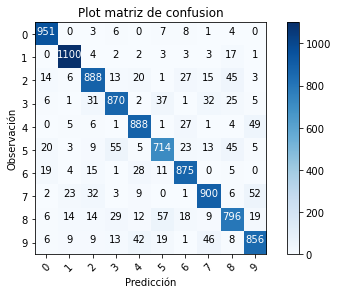

In [59]:
plot_confusion_matrix(confusion_mtx, classes=range(10))